In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(tibble)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## Load data
rgc <- readRDS(file = paste0("./load_files/", "RGC_seu_for_DEG_analysis.rds"))
subrgc <- subset(rgc, cluster2 %in% c("NEP RSPO3", "vRG HMGA2 CCND1", "vRG SAT1 STMN2", 
                                      "oRG HOPX APOE", "oRG HOPX TNC"))

In [3]:
## Calculate Average expression for each rgc subtype in each region
all_regs <- c("FC", "MSC", "TC", "OcC")
reg_avgs <- lapply(all_regs, function(reg) {
    print(paste0("Working on region:", reg))
    reg_seu <- subrgc
    reg_seu$newlobe <- ifelse(reg_seu$lobe == reg, reg, "bg")
    reg_seu$avgcls <- paste0(reg_seu$newlobe, "|", reg_seu$cluster2)

    Idents(reg_seu) <- "avgcls"
    avg <- as.matrix(AverageExpression(reg_seu, assay = "RNA")$RNA)
    return(avg)
    }) %>%
    setNames(., all_regs)
lapply(reg_avgs, head, 20)

[1] "Working on region:FC"


Finished averaging RNA for cluster FC|vRG HMGA2 CCND1

Finished averaging RNA for cluster FC|NEP RSPO3

Finished averaging RNA for cluster FC|vRG SAT1 STMN2

Finished averaging RNA for cluster bg|NEP RSPO3

Finished averaging RNA for cluster bg|vRG HMGA2 CCND1

Finished averaging RNA for cluster bg|vRG SAT1 STMN2

Finished averaging RNA for cluster bg|oRG HOPX TNC

Finished averaging RNA for cluster FC|oRG HOPX TNC

Finished averaging RNA for cluster FC|oRG HOPX APOE

Finished averaging RNA for cluster bg|oRG HOPX APOE



[1] "Working on region:MSC"


Finished averaging RNA for cluster bg|vRG HMGA2 CCND1

Finished averaging RNA for cluster bg|NEP RSPO3

Finished averaging RNA for cluster bg|vRG SAT1 STMN2

Finished averaging RNA for cluster MSC|vRG HMGA2 CCND1

Finished averaging RNA for cluster MSC|oRG HOPX TNC

Finished averaging RNA for cluster MSC|vRG SAT1 STMN2

Finished averaging RNA for cluster bg|oRG HOPX TNC

Finished averaging RNA for cluster bg|oRG HOPX APOE

Finished averaging RNA for cluster MSC|oRG HOPX APOE



[1] "Working on region:TC"


Finished averaging RNA for cluster bg|vRG HMGA2 CCND1

Finished averaging RNA for cluster bg|NEP RSPO3

Finished averaging RNA for cluster bg|vRG SAT1 STMN2

Finished averaging RNA for cluster bg|oRG HOPX TNC

Finished averaging RNA for cluster TC|vRG SAT1 STMN2

Finished averaging RNA for cluster TC|oRG HOPX TNC

Finished averaging RNA for cluster bg|oRG HOPX APOE

Finished averaging RNA for cluster TC|oRG HOPX APOE



[1] "Working on region:OcC"


Finished averaging RNA for cluster bg|vRG HMGA2 CCND1

Finished averaging RNA for cluster bg|NEP RSPO3

Finished averaging RNA for cluster bg|vRG SAT1 STMN2

Finished averaging RNA for cluster OcC|NEP RSPO3

Finished averaging RNA for cluster OcC|vRG HMGA2 CCND1

Finished averaging RNA for cluster OcC|vRG SAT1 STMN2

Finished averaging RNA for cluster bg|oRG HOPX TNC

Finished averaging RNA for cluster OcC|oRG HOPX TNC

Finished averaging RNA for cluster bg|oRG HOPX APOE

Finished averaging RNA for cluster OcC|oRG HOPX APOE



,FC|vRG HMGA2 CCND1,FC|NEP RSPO3,FC|vRG SAT1 STMN2,bg|NEP RSPO3,bg|vRG HMGA2 CCND1,bg|vRG SAT1 STMN2,bg|oRG HOPX TNC,FC|oRG HOPX TNC,FC|oRG HOPX APOE,bg|oRG HOPX APOE
PGBD2,0.019922056,0.026399284,0.021195441,0.0215215526,0.0157732125,0.012010005,0.020640196,0.008801302,0.0316662467,0.067458806
LOC114674980,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.002051090
TRNAE-CUC,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000
ZNF692,0.070068861,0.077239982,0.118408986,0.0557139084,0.0579830024,0.100420856,0.120892789,0.109061416,0.0784277745,0.068576485
TRNAL-CAA,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000
LOC114678402,0.008287472,0.002918187,0.009485500,0.0006570018,0.0065762524,0.005347597,0.013135427,0.008274102,0.0025761426,0.006290765
ZNF672,0.291702229,0.265641245,0.308726850,0.2217034827,0.2735438841,0.364625379,0.424780516,0.353282632,0.2350173014,0.215945062
LOC106995359,0.002812906,0.000000000,0.001842219,0.0000000000,0.0009336588,0.001125281,0.001087716,0.001715454,0.0005370774,0.001777501
SH3BP5L,0.079975241,0.066345924,0.178827677,0.0601326645,0.0779590610,0.175912882,0.171525138,0.177911306,0.1255267834,0.168893086
LYPD8,0.000000000,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000000,0.000000000,0.000000000,0.0000000000,0.000000000


In [4]:
## Calculate log Fold changes in each region
ptval <- 0.1 ##pseudovalue added to average expression
fc_res <- lapply(all_regs, function(reg) {
        avg <- reg_avgs[[reg]]
        sel_cls <- c("NEP RSPO3", "vRG HMGA2 CCND1", "vRG SAT1 STMN2", "oRG HOPX APOE", "oRG HOPX TNC")
        que_cols <- paste0(reg, "|", sel_cls) %>%
                    intersect(., colnames(avg))
        ref_cols <- gsub(paste0("^", reg, "\\|"), "bg|", que_cols) %>%
                    intersect(., colnames(avg))
        fc <- (avg[, que_cols] + ptval)/(avg[, ref_cols] + ptval)
        colnames(fc) <- gsub(paste0("^", reg, "\\|"), "", que_cols)

        ## Merge the FCs
        merge_list <- list(`vRG early` = c("NEP RSPO3", "vRG HMGA2 CCND1"),
                            `vRG late` = c("vRG SAT1 STMN2"),
                            `oRG` = c("oRG HOPX APOE", "oRG HOPX TNC"))
        merge_list <- merge_list[sapply(merge_list, function(x) 
            sum(x %in% colnames(fc)) >= 1)] ## Incase TC doesn't have vRG early

        mergefc <- lapply(names(merge_list), function(cls) {
            nmat <- log(apply(fc[, intersect(merge_list[[cls]], colnames(fc)), drop = FALSE], 1, max))
            return(nmat)
            }) %>%
            setNames(., names(merge_list)) %>%
            as.data.frame(., check.names = FALSE) 
        colnames(mergefc) <- paste0("logFC|", colnames(mergefc))
        mergefc <- mergefc %>%
            rownames_to_column("gene") %>%
            mutate(region = reg)

        return(mergefc)
        }) %>%
        setNames(., all_regs)
lapply(fc_res, head, 10)

,gene,logFC|vRG early,logFC|vRG late,logFC|oRG,region
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,PGBD2,0.03935418,0.07881626,-0.103289229,FC
2,LOC114674980,0.00000000,0.00000000,0.000000000,FC
3,TRNAE-CUC,0.00000000,0.00000000,0.000000000,FC
4,ZNF692,0.12948424,0.08594995,0.056794329,FC
5,TRNAL-CAA,0.00000000,0.00000000,0.000000000,FC
6,LOC114678402,0.02221565,0.03852678,-0.035573030,FC
7,ZNF672,0.12802239,-0.12818436,0.058613834,FC
8,LOC106995359,0.01844744,0.00706459,0.006190636,FC
9,SH3BP5L,0.03806688,0.01050878,0.023247298,FC


In [5]:
save(reg_avgs, fc_res, file = paste0("./load_files/", "Shared.region-markers.acrosssubtypes.avg.Rdata"))

In [6]:
##------------------------------------------------------------------------------------------
## Identify the list of Shared region-specific genes across early and late RGC subtypes. 

## Region DEGs (from FindMarkers)
allres <- readRDS(file = paste0("./load_files/", "Region_DEGs_rawres.rds"))

## Consider three situations
## 1. (expr ratio >= 0.1 & pct.2 <= 075)
slim_dex1 <- allres %>%
                filter(pct.1 >= 0.1 & pct.2 <= 0.75 & ratio_fc >= 1.4 & avg_logFC >= 0.2 & p_val_adj <= 0.001)
## 2. (expr ratio < 0.1 &  0.05)
slim_dex2 <- allres %>%
                filter(pct.1 >= 0.05 & pct.1 < 0.1 & ratio_fc >= 4 & avg_logFC >= 0.1 & p_val_adj <= 0.001)
## 3. highly expressed genes (pct.2 > 0.75)
slim_dex3 <- allres %>%
            filter(pct.2 > 0.75 & ratio_fc >= 1.1 & avg_logFC >= 1 & p_val_adj <= 0.001)


slim_dex <- rbind(slim_dex1, slim_dex2) %>%
            rbind(., slim_dex3)
head(slim_dex)
dim(slim_dex)

,gene,p_val,avg_logFC,pct.1,pct.2,p_val_adj,ratio_fc,region,cluster
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,NNAT,3.051199e-31,1.643136,0.937,0.433,1.056295e-26,2.137698,FC,Ependymal
2,LOC114669724,4.220031e-31,1.675669,0.992,0.457,1.460933e-26,2.145610,FC,Ependymal
3,MT3,1.079654e-29,1.597358,0.827,0.134,3.737653e-25,5.812500,FC,Ependymal
4,SLC47A2,7.830980e-27,1.313749,0.890,0.205,2.711007e-22,4.186047,FC,Ependymal
5,ANKRD65,1.643786e-25,1.342576,0.937,0.354,5.690623e-21,2.601648,FC,Ependymal
6,FBLN1,1.092721e-23,1.246789,0.858,0.323,3.782891e-19,2.606607,FC,Ependymal


[1] 983   9

In [7]:
## Shared DEGs
all_regs <- c("FC", "MSC", "TC", "OcC")
share_sigs <- lapply(all_regs, function(reg) {
    reg_dex <- slim_dex %>%
            filter(cluster %in% c("NEP RSPO3", "vRG HMGA2 CCND1", "vRG SAT1 STMN2", "oRG HOPX APOE", "oRG HOPX TNC") &
                   region %in% reg) %>%
            mutate(group = case_when(
                cluster %in% c("NEP RSPO3", "vRG HMGA2 CCND1") ~ "vRG early", 
                cluster %in% c("vRG SAT1 STMN2") ~ "vRG late", 
                cluster %in% c("oRG HOPX APOE", "oRG HOPX TNC") ~ "oRG"
                )) %>%
            group_by(group, gene) %>%
            top_n(1, wt = avg_logFC) %>% ## for each gene within in a given group, choose the one maximum avg_logFC
            ungroup() %>%
            group_by(gene) %>%
            mutate(nhits = n()) %>%
            ungroup()

    ## For each gene, find all the groups where it show regional enrichment
    all_genes <- unique(reg_dex$gene)
    enr_mat <- matrix(NA, nrow = length(all_genes), ncol = 3, 
                      dimnames = list(all_genes, c("vRG early", "vRG late", "oRG")))
    for (ii in c("vRG early", "vRG late", "oRG")) {
        enr_mat[, ii] <- sapply(all_genes, function(gg) {
            value <- ifelse(ii %in% reg_dex$group[reg_dex$gene == gg], 1, 0)
            value
            })
    }

    ## get the fold changes
    reg_fc <- fc_res[[reg]] %>%
                filter(gene %in% rownames(enr_mat))


    corres <- reg_fc %>%
                select(-region) %>%
                column_to_rownames("gene") %>%
                cor(., method = "p")
    print(corres)


    reg_fc <- reg_fc[match(rownames(enr_mat), reg_fc$gene), ]
    print(identical(reg_fc$gene, rownames(enr_mat)))
    rownames(enr_mat) <- NULL
    df <- cbind(reg_fc, enr_mat) %>%
            as.data.frame(., check.names= FALSE) %>%
            mutate(Shared = ifelse(rowSums(enr_mat) == 0, 1, 0)) %>%
            tidyr::gather(., "latetype", "xlogFC", 
                          intersect(colnames(reg_fc), paste0("logFC|", c("vRG late", "oRG"))))

    colnames(df) <- gsub("\\|", "..", colnames(df)) %>%
            gsub(" ", ".", .)

    df$radius <- 0.05
    df
    }) %>%
    setNames(., all_regs)
head(share_sigs[["FC"]])

                logFC|vRG early logFC|vRG late  logFC|oRG
logFC|vRG early      1.00000000     0.06888459 0.06920558
logFC|vRG late       0.06888459     1.00000000 0.73750692
logFC|oRG            0.06920558     0.73750692 1.00000000
[1] TRUE
                logFC|vRG early logFC|vRG late  logFC|oRG
logFC|vRG early       1.0000000     -0.2286106 -0.3021543
logFC|vRG late       -0.2286106      1.0000000  0.5248541
logFC|oRG            -0.3021543      0.5248541  1.0000000
[1] TRUE
               logFC|vRG late logFC|oRG
logFC|vRG late      1.0000000 0.2942474
logFC|oRG           0.2942474 1.0000000
[1] TRUE
                logFC|vRG early logFC|vRG late  logFC|oRG
logFC|vRG early       1.0000000     -0.2750821 -0.2348342
logFC|vRG late       -0.2750821      1.0000000  0.2332785
logFC|oRG            -0.2348342      0.2332785  1.0000000
[1] TRUE


,gene,logFC..vRG.early,region,vRG.early,vRG.late,oRG,Shared,latetype,xlogFC,radius
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,PTN,2.071802,FC,1,0,0,0,logFC|vRG late,1.1088451,0.05
2,NNAT,1.295826,FC,1,0,0,0,logFC|vRG late,0.2965895,0.05
3,RBP1,2.304792,FC,1,1,1,0,logFC|vRG late,1.4080498,0.05
4,LOC106993104,2.051888,FC,1,0,0,0,logFC|vRG late,0.1676044,0.05
5,DCT,2.920498,FC,1,1,1,0,logFC|vRG late,2.6311457,0.05
6,COL2A1,2.009781,FC,1,0,0,0,logFC|vRG late,0.0754254,0.05



********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Warning message:
“Removed 552 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 256 rows containing missing values (geom_text_repel).”
Warning message:
“Removed 288 rows containing missing values (geom_text_repel).”


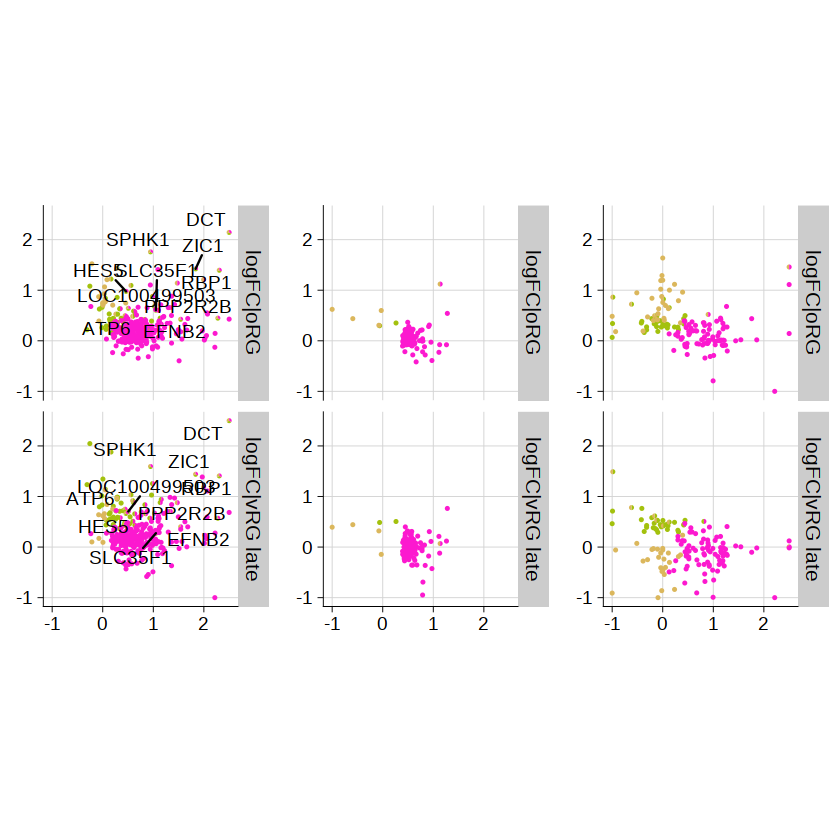

In [8]:
##source("~/project/PFC/MF7_contact/pie.fun.R")
##source("./ptime.fun.v2.R")
library(cowplot)
source("./pie.fun.v2.R")

plist <- lapply(c("FC", "MSC", "OcC"), function(reg){
    p <- PlotWeightedScatterPie(pie.data = share_sigs[[reg]], 
                                x.col = "logFC..vRG.early", 
                                y.col = "xlogFC", r.col = "radius", 
                                cls_use = c("vRG.early", "vRG.late", "oRG"), 
                                rsf = 1, scale.expression = FALSE, 
                                fc_limit = c(-1, 2.5))
    return(p)
})
##pdf(paste0("./report/", "Shared_region_markers.weightedPie.all.pdf"), width = 12, height = 8)
##plot <- patchwork::wrap_plots(list(p1, p2, p3), nrow = 1, ncol = 3)
pcbn <- plot_grid(plotlist = plist, nrow = 1, ncol = 3)
options(jupyter.plot_scale = 1)
pcbn
##print(pcbn)
##dev.off()

In [9]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux Server 7.9 (Maipo)

Matrix products: default
BLAS:   /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRblas.so
LAPACK: /gpfs/ycga/home/sm2726/packages/R_versions/R-3.6.1/lib64/R/lib/libRlapack.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tidyr_1.1.3      ggforce_0.3.1    scatterpie_0.1.5 cowplot_1.0.0   
[5] tibble_3.0.1     ggplot2_3.3.0    dplyr_1.0.7      Seurat_3.1.5    

loaded via a namespace (and not attached):
 [1